#### Importing the necessary data from the train set using pandas 

In [178]:
import pandas as pd
from sklearn import linear_model,svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

def load_data():
    
    test_data = pd.read_csv('test.csv')
    #test_data.dropna(inplace=True)
    train_data = pd.read_csv('train.csv')
    return train_data,test_data
#print(train_data.shape,test_data.shape)
#print(test_data)
train_data, test_data = load_data()
#print(test_data)
#print(train_data)

### Data Pre-Processing Support Functions

In [179]:
def map_gender(x):
    mp= {'male':1, 'female':2}
    return x['Sex'].map(mp)

In [180]:
def map_parent(x):
    func = lambda y:0 if y==0 else 1
    return x['Parch'].map(func)

In [181]:
def map_sib(x):
    func = lambda y:0 if y==0 else 1
    return x['SibSp'].map(func)

# Version 1.0 

In [182]:
def preprocess_to_v1(test):
    tst =test.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin','Embarked','Parch', 'SibSp'], axis=1)
    tst['Sex'] = map_gender(tst)
    return tst

This version of the Solution uses only Pclass and Sex as features.

##### Split train, test data for local testing

In [183]:
def version1_data(train_data):
    train =train_data.copy()
    x =train.drop(['PassengerId','Survived','Name','Age','Ticket','Fare','Cabin','Embarked','Parch', 'SibSp'], axis=1)
    x['Sex'] = map_gender(x)
    y =train['Survived']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
    return x_train, x_test, y_train, y_test

# Version 2.0 

In [184]:
def preprocess_to_v2(test):
    tst =test.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis=1)
    tst['Sex'] = map_gender(tst)
    tst['Age'] = tst['Age'].transform(lambda x: x.fillna(x.mean()))
    return tst

This version of the solution adds three new features(Age number of parents and number of siblings) to the training data set and drops any data row with None(NULL) values

In [185]:
def version2_data(train_data):
    train =train_data.copy()
    train =train.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis=1)
    train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    train['Sex'] = map_gender(train)
    y =train['Survived']
    x = train.drop(['Survived'], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
    return x_train, x_test, y_train, y_test

# Version 3.0 

In [186]:
def preprocess_to_v3(test):
    tst =test.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis=1)
    tst['Sex'] = map_gender(tst)
    min_max_scaler = preprocessing.MinMaxScaler()
    tst['Age'] = tst.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    for s in ['Age']:
        tst[s] = min_max_scaler.fit_transform(tst[s].values.reshape(-1, 1))
    return tst

In [187]:
def version3_data(train_data):
    train =train_data.copy()
    train =train.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis=1)
    train =train.dropna(axis=0, how='any')
    y =train['Survived']
    x = train.drop(['Survived'], axis=1)
    x['Sex']= map_gender(x)
    min_max_scaler = preprocessing.MinMaxScaler()
    for s in ['Age']:
        x[s] = min_max_scaler.fit_transform(x[s].values.reshape(-1, 1))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
    return x_train, x_test, y_train, y_test   

# Version 4.0 

In [188]:
def preprocess_to_v4(test):
    tst =test.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked','Parch', 'SibSp'], axis=1)
    tst['Sex'] = map_gender(tst)
    min_max_scaler = preprocessing.MinMaxScaler()
    tst['Age'] = tst['Age'].transform(lambda x: x.fillna(x.mean()))
    #for s in ['Age']:
        #tst[s] = min_max_scaler.fit_transform(tst[s].values.reshape(-1, 1))
    return tst

This version of the Solution uses only Pclass and Sex as features.

##### Split train, test data for local testing

In [189]:
def version4_data(train_data):
    train =train_data.copy()
    x =train.drop(['PassengerId','Survived','Name','Ticket','Fare','Cabin','Embarked','Parch', 'SibSp'], axis=1)
    x['Sex'] = map_gender(x)
    y =train['Survived']
    x['Age'] = x['Age'].transform(lambda i: i.fillna(i.mean()))
    #print(x['Age'])
    min_max_scaler = preprocessing.MinMaxScaler()
    #for s in ['Age']:
        #x[s] = min_max_scaler.fit_transform(x[s].values.reshape(-1, 1))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
    return x_train, x_test, y_train, y_test

# Version 5.0 

In [214]:
def preprocess_to_v5(test):
    tst =test.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked','Parch', 'SibSp'], axis=1)
    tst['Sex'] = map_gender(tst)
    min_max_scaler = preprocessing.MinMaxScaler()
    tst['Age'] = tst['Age'].transform(lambda x: x.fillna(x.mean()))
    tst['Age'] =[ 0 if i in range(0, 12) else (1 if i in range(12,40) else (2 if i in range(40,100) else 3)) for i in tst['Age']]
    #for s in ['Age']:
        #tst[s] = min_max_scaler.fit_transform(tst[s].values.reshape(-1, 1))
    return tst

This version of the Solution uses only Pclass and Sex as features.

##### Split train, test data for local testing

In [216]:
def version5_data(train_data):
    train =train_data.copy()
    x =train.drop(['PassengerId','Survived','Name','Ticket','Fare','Cabin','Embarked','Parch', 'SibSp'], axis=1)
    x['Sex'] = map_gender(x)
    y =train['Survived']
    x['Age'] = x['Age'].transform(lambda i: i.fillna(i.mean()))
    x['Age'] =[ 0 if i in range(0, 12) else (1 if i in range(12,40) else (2 if i in range(40,100) else 3)) for i in x['Age']]
    #print(x['Age'])
    min_max_scaler = preprocessing.MinMaxScaler()
    #for s in ['Age']:
        #x[s] = min_max_scaler.fit_transform(x[s].values.reshape(-1, 1))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
    return x_train, x_test, y_train, y_test

# Creating Different Learning Models

# Linear Regression

In [198]:
def lenear_regression(x_train,y_train):
    model = linear_model.LinearRegression(normalize=True)
    model.fit(x_train,y_train)
    return model

# Logistic Regression Model Example

In [191]:
def logistic_regression(x_train,y_train):
    logistic_reggression_model = linear_model.LogisticRegression(C=1e5)
    logistic_reggression_model.fit(x_train,y_train)
    return logistic_reggression_model

# SVM Classifier

In [192]:
def svm_classifier(x_train,y_train):
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(x_train,y_train)
    return clf

# Decision Tree

In [193]:
def decision_tree(x_train,y_train):
    decision_tree = DecisionTreeClassifier(min_samples_split=20, random_state=99)
    decision_tree.fit(x_train,y_train)
    return decision_tree


In [196]:
def decision_tree_regressor(x_train,y_train):
    decision_tree = DecisionTreeRegressor(min_samples_leaf = 4, max_depth = 6)
    decision_tree.fit(x_train,y_train)
    return decision_tree

# KNN

In [225]:
from sklearn.neighbors import KNeighborsClassifier
def knn(x_train,y_train):
    clf = KNeighborsClassifier(n_neighbors = 8)
    clf.fit(x_train,y_train)
    return clf

Visualizing Data obtained by the best performing Decision Tree Algorithm

# Testing Performance of Different Models

### with Version 1 data

In [126]:
train_data, test_data = load_data()
x_train, x_test, y_train, y_test  = version1_data(train_data)
#print(x_train)
# lINEAR REGRESSION MODEL
model = lenear_regression(x_train,y_train)
print('Linear Regressor Score : '+str(model.score(x_test,y_test)))



test = preprocess_to_v1(test_data)
#print(test)
sol =  model.predict(test)
sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })

submission.to_csv('Version 1- linear.csv', encoding='utf-8', index=False)

model = logistic_regression(x_train,y_train)
print('Logistic Regressor Score : '+str(model.score(x_test,y_test)))

test = preprocess_to_v1(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 1- Logistic.csv', encoding='utf-8', index=False)


# SVM MODEL
model = svm_classifier(x_train,y_train)
print('SVM Classifier Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v1(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 1- SVM.csv', encoding='utf-8', index=False)


# DECISION TREE MODEL
model = decision_tree(x_train,y_train)
print('Decision Tree Classifier Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v1(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 1- Decision Tree.csv', encoding='utf-8', index=False)

Linear Regressor Score : 0.366972985962
Logistic Regressor Score : 0.784753363229
SVM Classifier Score : 0.7533632287
Decision Tree Classifier Score : 0.7533632287


### with Version 2 data

In [207]:
train_data, test_data = load_data()
x_train, x_test, y_train, y_test  = version2_data(train_data)
#print(x_train.head(5))
# lINEAR REGRESSION MODEL
model = lenear_regression(x_train,y_train)
print('Linear Regressor Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v2(test_data)
#print(test)
sol =  model.predict(test)
sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 2- Linear.csv', encoding='utf-8', index=False)



# lOGISTIC REGRESSION MODEL
model = logistic_regression(x_train,y_train)
print('Logistic Regressor Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v2(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 2- Logistic.csv', encoding='utf-8', index=False)



# SVM MODEL
model = svm_classifier(x_train,y_train)
print('SVM Classifier Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v2(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 2- SVM.csv', encoding='utf-8', index=False)



# DECISION TREE MODEL
model = decision_tree(x_train,y_train)
print('Decision Tree Classifier Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v2(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 2- DT.csv', encoding='utf-8', index=False)


# KNN MODEL
model = knn(x_train,y_train)
print('KNN Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v2(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>=0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
##print(submission)
submission.to_csv('Version 2- KNN.csv', encoding='utf-8', index=False)

Linear Regressor Score : 0.36412087449
Logistic Regressor Score : 0.807174887892
SVM Classifier Score : 0.77130044843
Decision Tree Classifier Score : 0.77130044843
KNN Score : 0.704035874439


### with Version 3 data

In [222]:
train_data, test_data = load_data()
x_train, x_test, y_train, y_test  = version3_data(train_data)

# lINEAR REGRESSION MODEL
model = lenear_regression(x_train,y_train)
print('Linear Regressor Score : '+str(model.score(x_test,y_test)))
      
# lOGISTIC REGRESSION MODEL
model = logistic_regression(x_train,y_train)
print('Logistic Regressor Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v2(test_data)
#print(test)
sol =  model.predict(test)
sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 3- Logistic.csv', encoding='utf-8', index=False)




# SVM MODEL
model = svm_classifier(x_train,y_train)
print('SVM Classifier Score : '+str(model.score(x_test,y_test)))
      
# DECISION TREE MODEL
model = decision_tree(x_train,y_train)
print('Decision Tree Classifier Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v3(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 3- DT.csv', encoding='utf-8', index=False)


# KNN MODEL
model = knn(x_train,y_train)
print('KNN Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v3(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>=0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
##print(submission)
submission.to_csv('Version 3- KNN.csv', encoding='utf-8', index=False)

Linear Regressor Score : 0.413197454617
Logistic Regressor Score : 0.804469273743
SVM Classifier Score : 0.782122905028
Decision Tree Classifier Score : 0.837988826816
KNN Score : 0.804469273743


### with Version 4 data

In [221]:
train_data, test_data = load_data()
x_train, x_test, y_train, y_test  = version4_data(train_data)
#print(x_train.head(5))
# lINEAR REGRESSION MODEL
model = lenear_regression(x_train,y_train)
print('Linear Regressor Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v4(test_data)
#print(test)
sol =  model.predict(test)
sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 4- Linear.csv', encoding='utf-8', index=False)



# lOGISTIC REGRESSION MODEL
model = logistic_regression(x_train,y_train)
print('Logistic Regressor Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v4(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 4- Logistic.csv', encoding='utf-8', index=False)



# SVM MODEL
model = svm_classifier(x_train,y_train)
print('SVM Classifier Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v4(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 4- SVM.csv', encoding='utf-8', index=False)



# DECISION TREE MODEL
model = decision_tree(x_train,y_train)
print('Decision Tree Classifier Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v4(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 4- DT.csv', encoding='utf-8', index=False)


# DECISION TREE  Regressor MODEL
model = decision_tree_regressor(x_train,y_train)
print('Decision Tree Regressor Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v4(test_data)
#print(test)
sol =  model.predict(test)
sol = [1 if i>=0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 4- DTR.csv', encoding='utf-8', index=False)


# KNN MODEL
model = knn(x_train,y_train)
print('KNN Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v4(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>=0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
##print(submission)
submission.to_csv('Version 4- KNN.csv', encoding='utf-8', index=False)


Linear Regressor Score : 0.362902522059
Logistic Regressor Score : 0.811659192825
SVM Classifier Score : 0.7533632287
Decision Tree Classifier Score : 0.766816143498
Decision Tree Regressor Score : 0.320305947716
KNN Score : 0.708520179372


### with Version 5 data

In [226]:
train_data, test_data = load_data()
x_train, x_test, y_train, y_test  = version5_data(train_data)
#print(x_train.head(5))
# lINEAR REGRESSION MODEL
model = lenear_regression(x_train,y_train)
print('Linear Regressor Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v5(test_data)
#print(test)
sol =  model.predict(test)
sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 5- Linear.csv', encoding='utf-8', index=False)



# lOGISTIC REGRESSION MODEL
model = logistic_regression(x_train,y_train)
print('Logistic Regressor Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v5(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 5- Logistic.csv', encoding='utf-8', index=False)



# SVM MODEL
model = svm_classifier(x_train,y_train)
print('SVM Classifier Score : '+str(model.score(x_test,y_test)))
test = preprocess_to_v5(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 5- SVM.csv', encoding='utf-8', index=False)



# DECISION TREE MODEL
model = decision_tree(x_train,y_train)
print('Decision Tree Classifier Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v5(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 5- DT.csv', encoding='utf-8', index=False)


# DECISION TREE  Regressor MODEL
model = decision_tree_regressor(x_train,y_train)
print('Decision Tree Regressor Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v5(test_data)
#print(test)
sol =  model.predict(test)
sol = [1 if i>=0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
submission.to_csv('Version 5- DTR.csv', encoding='utf-8', index=False)


# KNN MODEL
model = knn(x_train,y_train)
print('KNN Score : '+ str(model.score(x_test,y_test)))
test = preprocess_to_v5(test_data)
#print(test)
sol =  model.predict(test)
#sol = [1 if i>=0.5 else 0 for i in sol]
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": sol
    })
##print(submission)
submission.to_csv('Version 4- KNN.csv', encoding='utf-8', index=False)


Linear Regressor Score : 0.356581644235
Logistic Regressor Score : 0.775784753363
SVM Classifier Score : 0.766816143498
Decision Tree Classifier Score : 0.766816143498
Decision Tree Regressor Score : 0.36231360399
KNN Score : 0.793721973094


In [9]:

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        g = export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dt.png"]
    try:
        subprocess.check_call(command)
        return g
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

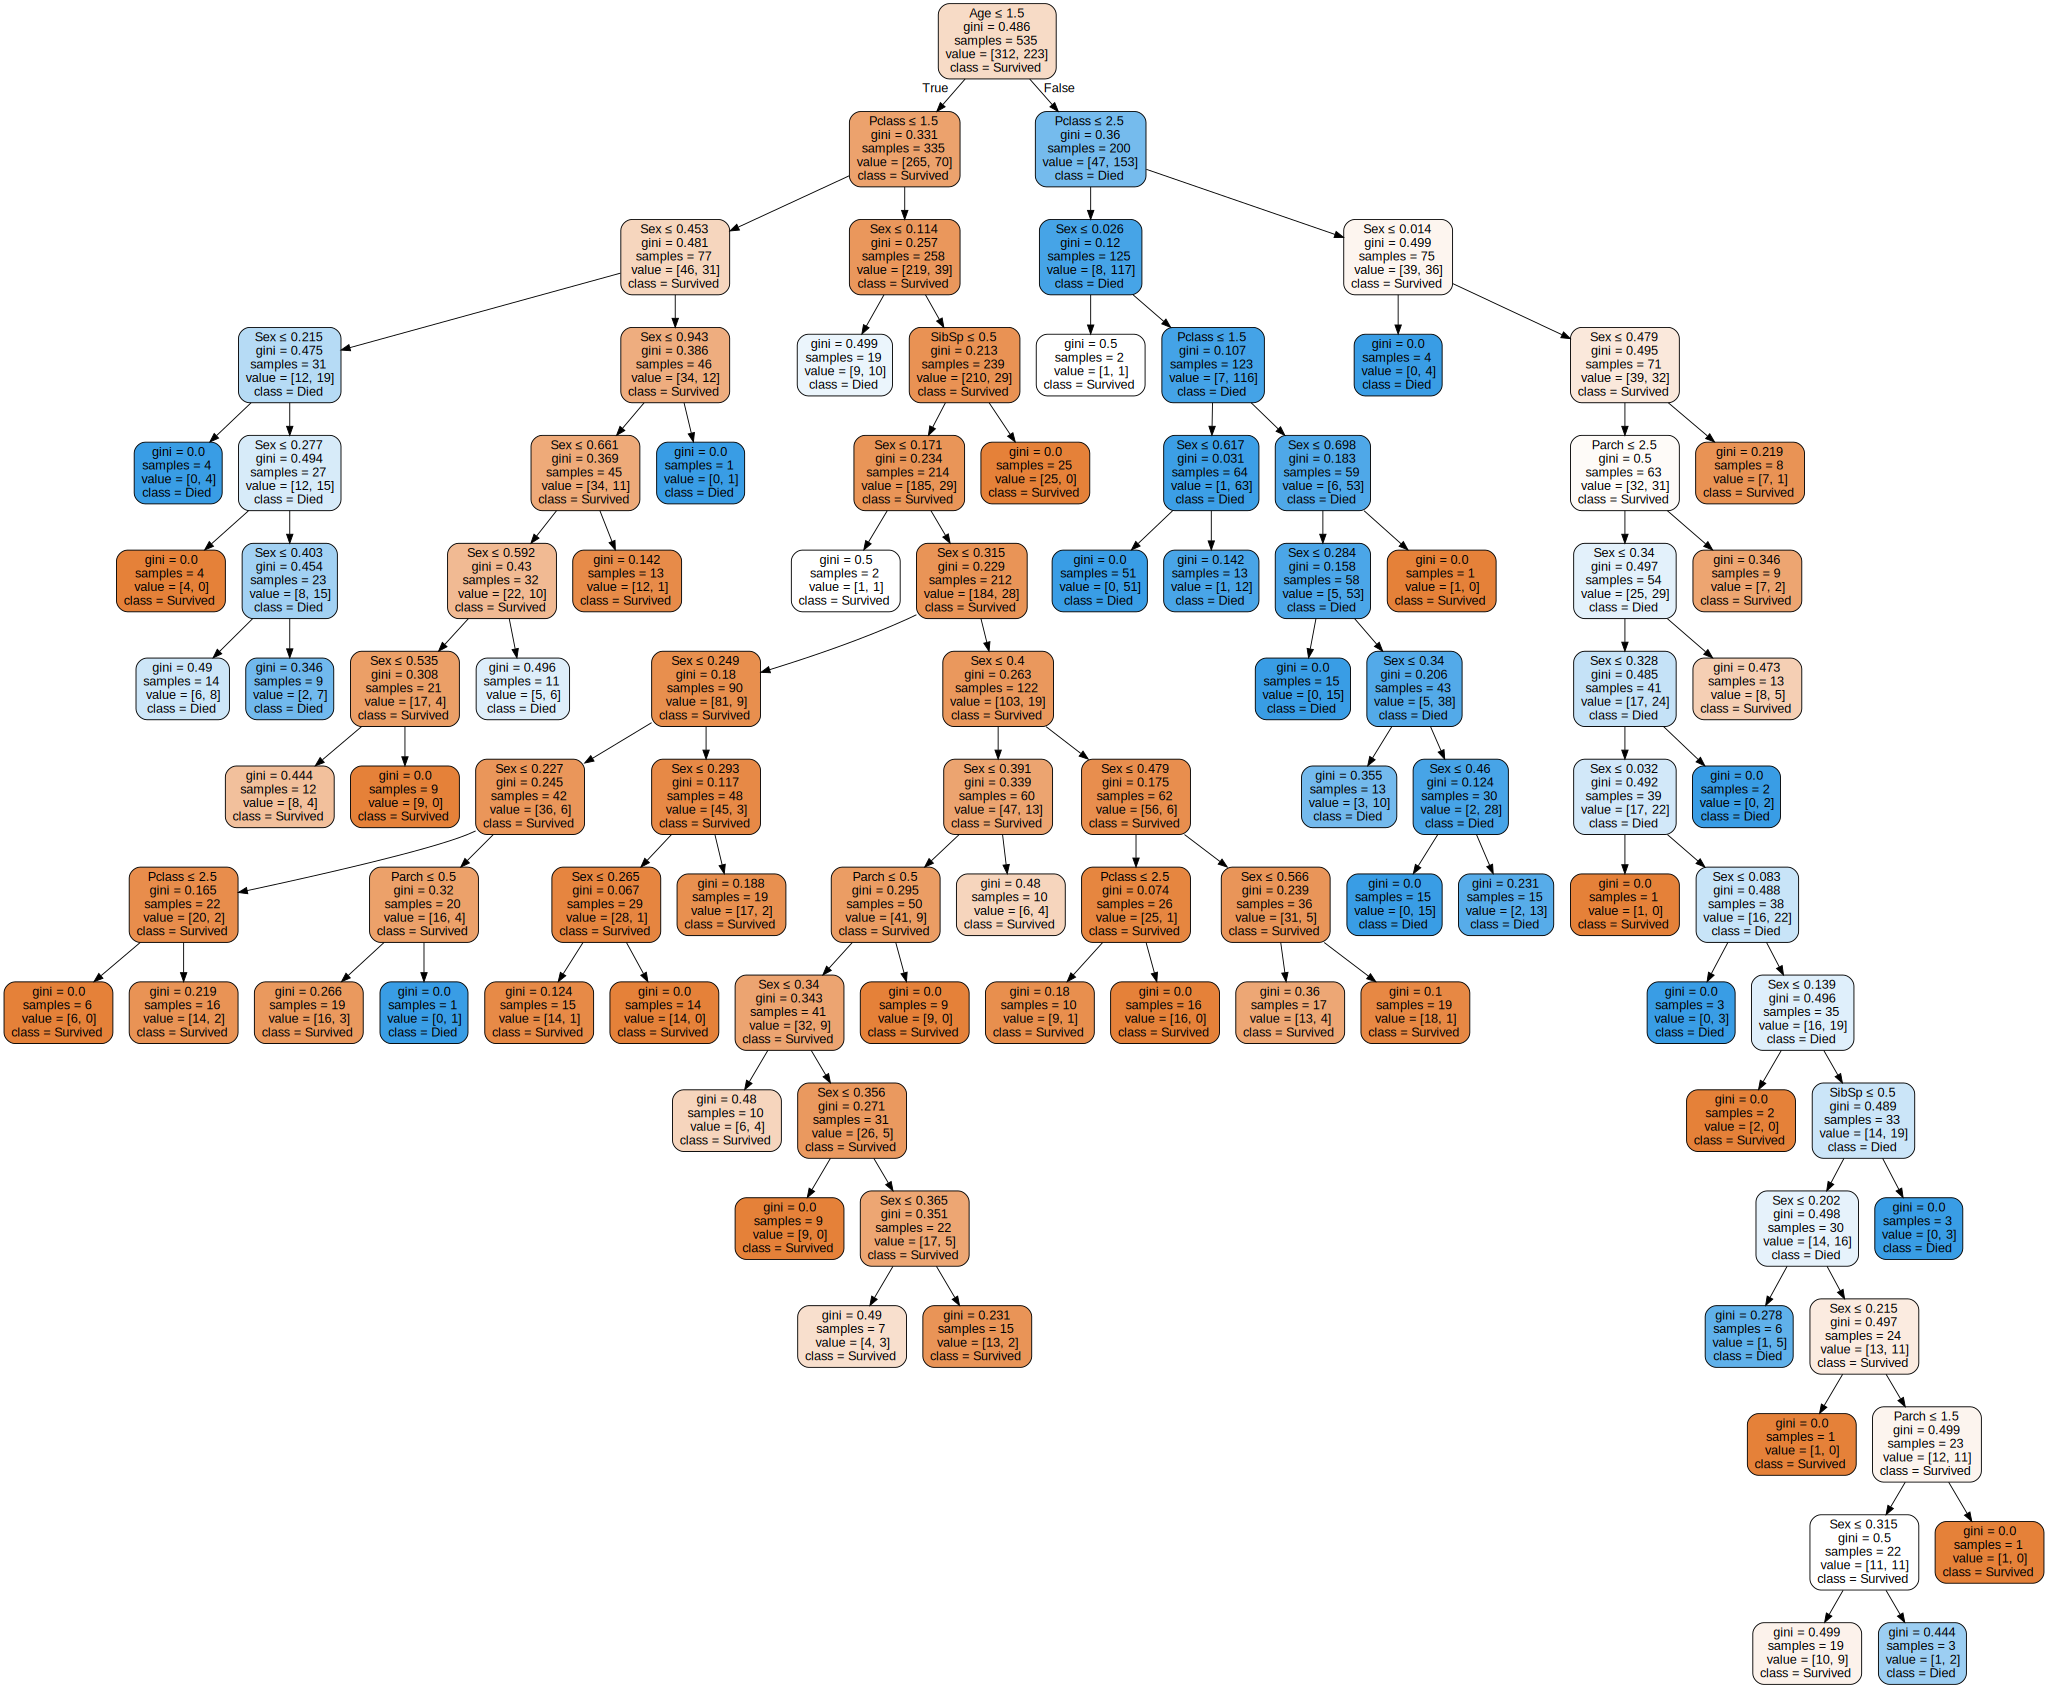

In [11]:
dot_data = export_graphviz(decision_tree, out_file=None, 
                         feature_names=f,  
                         class_names=['Survived','Died'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 